**DSCI100 Final Project Report**

Group 19 (Aneeta Zhou, Avishka Pratap, Hannah Pruner, Ksenia Khoroshun)

**Introduction**

In this project, analysis on data from the High Time Resolution Universe Pulsar Survey  will be done to gain a better understanding of how to better classify Neutron stars (also known as pulsars).

Studying pulsars allows researchers to explore “space-time, the interstellar medium, and states of matter.” However, radio signals received to identify pulsars are obstructed with radio frequency interference (RFI) and noise. As a result, there is demand for advanced learning tools that will be able to automatically label pulsar candidates.

If the pulse’s signal is integrated with respect to its rotational period, a unique integrated profile can be created for the pulse. A DM-SNR curve plots the spectral supernova remnants (SNR) as a function of the trail dispersion measure (DM).

The question that this project will answer is “Can an unclassified candidate be classified as a pulsar based on observed characteristics?" The characteristics that will be used in this classification, consisting of information from both the integrated profile and the DM-SNR curve, will be determined based on which one—integrated profile or DM-SNR curve provides a model with the highest prediction accuracy.

The dataset that is used for this project provides information on 17,898 candidates—16,259 are examples of RFI/noise, and 1,639 are examples of real pulsars. 8 variables corresponding to data about the integrated profile and DM-SNR curve of the candidates, will be further analyzed in the project to answer the research question.


**Methods & Results**

In our exploratory data analysis, we did cross validation while tuning the classifiers for different combinations of classifiers to determine which classifiers at which k value would give us the most accurate model. We then used these parameters to build a model that would classify a candidate for our planned data analysis.


***Loading, cleaning and wrangling the data into R***

1. Load the libraries tidyverse, tidymodels, repr, ggplot2 and cowplot.


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

2. Read the data from the web using the read_csv() function.
    - Add column names to the dataframe using the mutate() function
    - Change the class to a categorical variable using the as_factor() function.
    - Use the sample_n() function to randomly sample 500 observations from the dataframe.
        - Here we reduce the dataset to a workable size, as there were too many observations initially.
    - Name the output as pulsar_data.

Note: Here we chose not to balance for pulsar and non-pulsar class, as when we conducted the analysis with a variety of different balancing methods, this resulted in unusual elbow-plots in a later stage. This unbalanced method also produced high quality confusion matrices in a later step.

In [3]:
# Reading data from the web

set.seed(19)

pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename("mean_ip" = X1, 
                       "std_dev_ip" = X2, 
                       "excess_kurtosis_ip" = X3, 
                       "skewness_ip" = X4, 
                       "mean_dm" = X5,
                       "std_dev_dm" = X6,
                       "excess_kurtosis_dm" = X7,
                       "skewness_dm" = X8,
                       "class" = X9) %>%
                mutate(class = as_factor(class)) %>%
                sample_n(size = 500)

pulsar_data   

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dm,std_dev_dm,excess_kurtosis_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
107.91406,37.32941,0.30272446,1.58089787,3.9272575,24.924345,6.711611,46.2225904,0
14.70312,29.81594,7.21863076,52.86635443,81.6028428,57.256627,1.058996,1.2584176,1
99.52344,54.36896,0.63675112,-0.22504476,2.2784281,15.332172,10.197710,127.5418937,0
106.06250,51.40354,0.31323378,-0.33572020,4.6889632,26.324866,6.360699,42.3073497,0
128.97656,55.67406,-0.08570242,-0.59446104,5.8586957,30.994971,5.618643,32.0538478,0
128.62500,43.70212,0.15793456,0.46496956,49.1906355,78.242754,1.043050,-0.7616284,0
95.39844,48.16286,0.51860972,0.49351065,2.2784281,18.554590,10.275586,114.6954798,0
123.57031,50.13352,0.13839104,-0.19433412,4.2433110,20.507895,6.616925,52.5052344,0
113.39844,51.77843,0.26218746,0.20984763,1.8545151,18.093558,10.431586,113.0406108,0


**Preliminary data analysis**

In [4]:
set.seed(19)

# Finding the maximum value for each variable
max_data <- pulsar_data %>%
            select(-class) %>%
            map_dfr(max) %>%
            pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "max")

# Finding the minimum value for each variable
min_data <- pulsar_data %>%
            select(-class) %>%
            map_dfr(min) %>%
            pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "min")

# Finding the mean value for each variable
mean_data <- pulsar_data %>%
             select(-class) %>%
             map_dfr(mean) %>%
             pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "mean")

# Combining min, max and mean data in a single dataframe
min_max_mean_data <- bind_cols(min_data, max_data, mean_data) %>%
                rename(value = value...1) %>%
                select(value, max, min, mean)

min_max_mean_data

# Counting the number of pulsar and non-pulsar datapoints in pulsar_data
pulsar_count <- pulsar_data %>%
                group_by(class) %>%
                summarize(n = n()) %>%
                select(class, n)
pulsar_count

New names:
* value -> value...1
* value -> value...3
* value -> value...5



value,max,min,mean
<chr>,<dbl>,<dbl>,<dbl>
mean_ip,177.828125,6.5000000,110.2503750
std_dev_ip,68.448329,28.4912267,46.3871655
excess_kurtosis_ip,7.218631,-1.4398314,0.5124081
skewness_ip,52.866354,-1.1692417,1.9890719
mean_dm,172.795987,0.3871237,12.8411906
std_dev_dm,97.800429,8.1553574,26.6084278
excess_kurtosis_dm,26.720612,-1.2869230,8.3651774
skewness_dm,800.111948,-1.9282120,106.9523447


`summarise()` ungrouping output (override with `.groups` argument)



class,n
<fct>,<int>
0,453
1,47


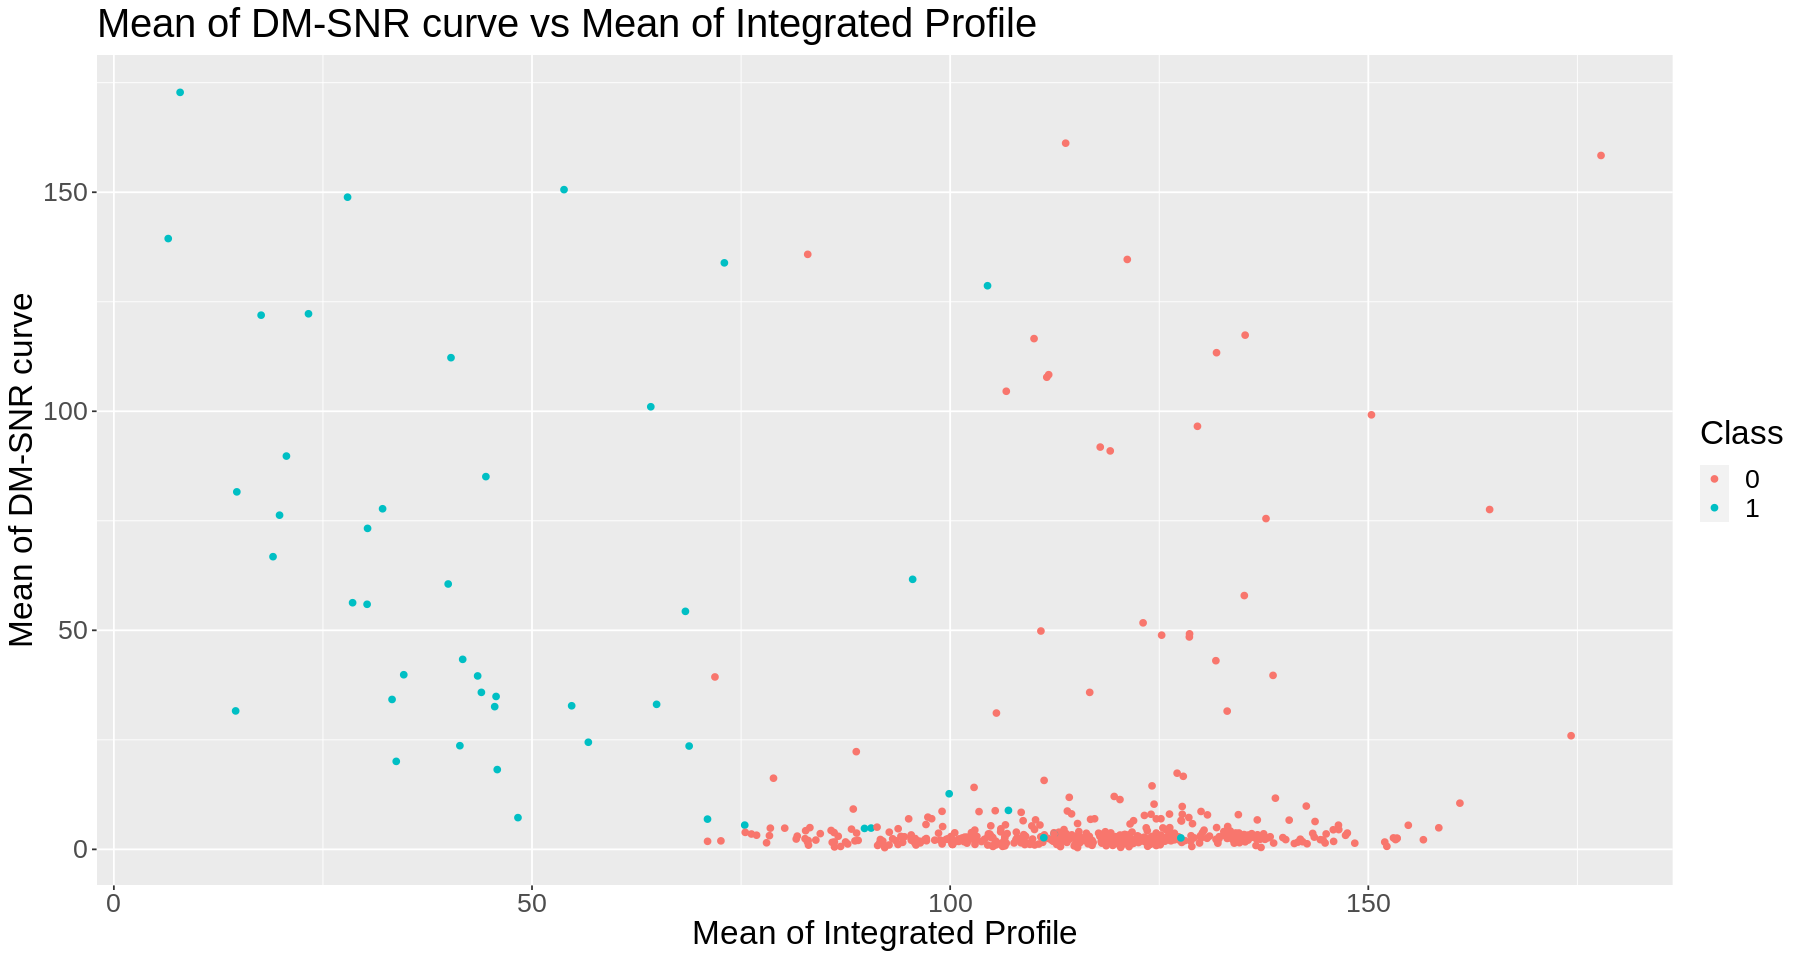

In [5]:
set.seed(19)

# Plotting scatterplots for Mean Intergrated Profile vs DM-SNR curve

options(repr.plot.width = 15, repr.plot.height = 8)

means_plot <- pulsar_data %>%
                ggplot(aes(x = mean_ip, y = mean_dm, color = class)) +
                geom_point() +
                labs(x = "Mean of Integrated Profile", y = "Mean of DM-SNR curve", color = "Class") +
                ggtitle("Mean of DM-SNR curve vs Mean of Integrated Profile") +
                theme(text = element_text(size = 20))
means_plot

***Splitting our data into training and testing sets***

3. Set seed as 19 for each consecutive cell.
4. Split the data into two sets in a ratio of 3:1 using the initial_split() function. Name the output as pulsar_split.
5. Create training and testing data sets by passing the object pulsar_split into the training and testing functions. Name the outputs as pulsar_training_data and pulsar_testing_data respectively.


In [10]:
set.seed(19)

# Splitting our data into training and testing sets

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

***Creating a knn classification model specification***

6. Create a knn classification model specification with a straight line as weight function and tuning on the number of neighbors. Name the output as knn_spec.


In [11]:
set.seed(19)

# knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

***Exploratory data analysis***

Here we are looking to see which value using which combination of predictors gives us the highest prediction accuracy, so we can use those parameters to build the most accurate model.

7. Carry out a 5-fold cross-validation on the training data using the vfold_cv() function with “class” in the strata argument and name the output as pulsar_vfold

In [12]:
set.seed(19)

# Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

8. Create a dataframe for k values from 1 to 10 using the tibble() function and name the output as k_values.
9. Create a recipe for the model using the mean and standard deviation of the integrated profile. Name the output as pulsar_ip_recipe_1.
10. Create a workflow analysis with the recipe and model specification using the tune_grid() function. Specify that the tuning should try k_values.
    - Collect the metrics from the workflow analysis using the collect_metrics() function.
    - Filter for accuracy and name the output as knn_ip_results_1.
11. Plot the neighbors k vs the accuracy using the ggplot function. Assign this plot to an object called ip_plot_1.

In [13]:
# Accuracy vs k plot for Mean and Standard deviation of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_1 <- recipe(class ~ mean_ip + std_dev_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors()) %>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_ip_results_1 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_1) %>%
       collect_metrics() %>%
       filter(.metric == "accuracy")

ip_plot_1 <- ggplot(knn_ip_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of Integrated Profile") +
       theme(text = element_text(size = 10)) 

12. Repeat steps 9 to 11 for each variable pair namely:
    - Mean and Skewness of the Integrated Profile
    - Mean and Excess kurtosis of the Integrated Profile
    - Mean and Standard deviation of the DM-SNR curve
    - Mean and Skewness of the DM-SNR curve
    - Mean and Excess kurtosis of the DM-SNR curve
    - Name the outputs accordingly.

In [14]:
# Accuracy vs k plot for Mean and Skewness of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_2 <- recipe(class ~ mean_ip + skewness_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_ip_results_2 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_2 <- ggplot(knn_ip_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [15]:
# Accuracy vs k plot for Mean and Excess kurtosis of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_3 <- recipe(class ~ mean_ip + excess_kurtosis_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_ip_results_3 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_3 <- ggplot(knn_ip_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [16]:
# Accuracy vs k plot for Mean and Standard deviation of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_1 <- recipe(class ~ mean_dm + std_dev_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_dm_results_1 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_1 <- ggplot(knn_dm_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [17]:
# Accuracy vs k plot for Mean and Skewness of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_2 <- recipe(class ~ mean_dm + skewness_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_dm_results_2 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_2 <- ggplot(knn_dm_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [18]:
# Accuracy vs k plot for Mean and Excess kurtosis of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_3 <- recipe(class ~ mean_dm + excess_kurtosis_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_dm_results_3 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_3 <- ggplot(knn_dm_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.85, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of DM-SNR curve") +
       theme(text = element_text(size = 10))

13. Analyze the accuracy vs k plots for each set of variables.

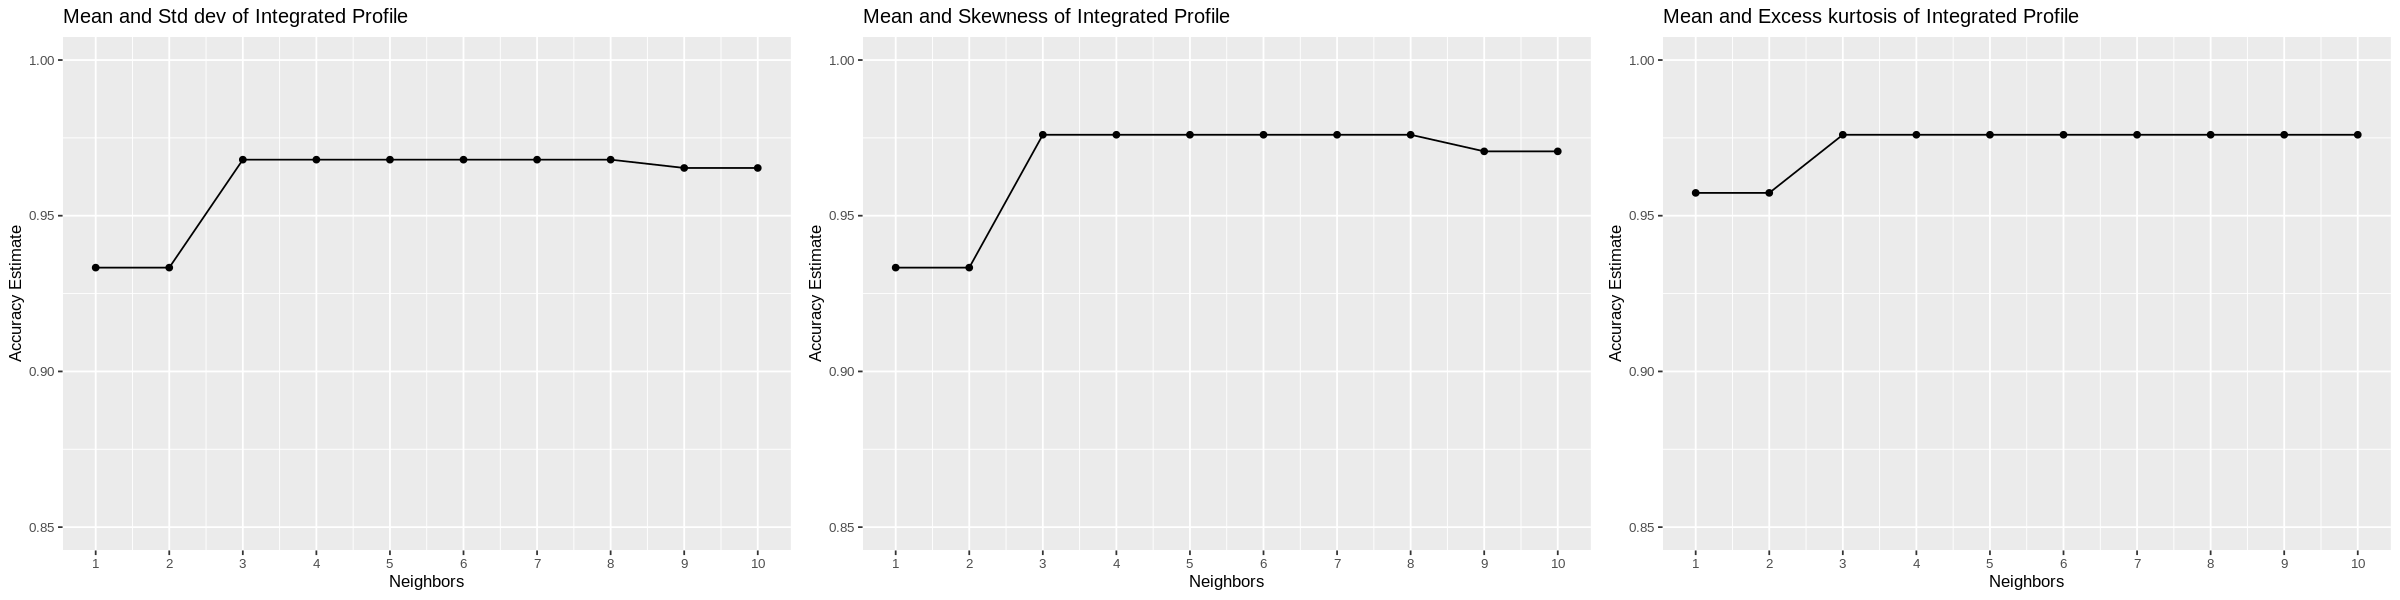

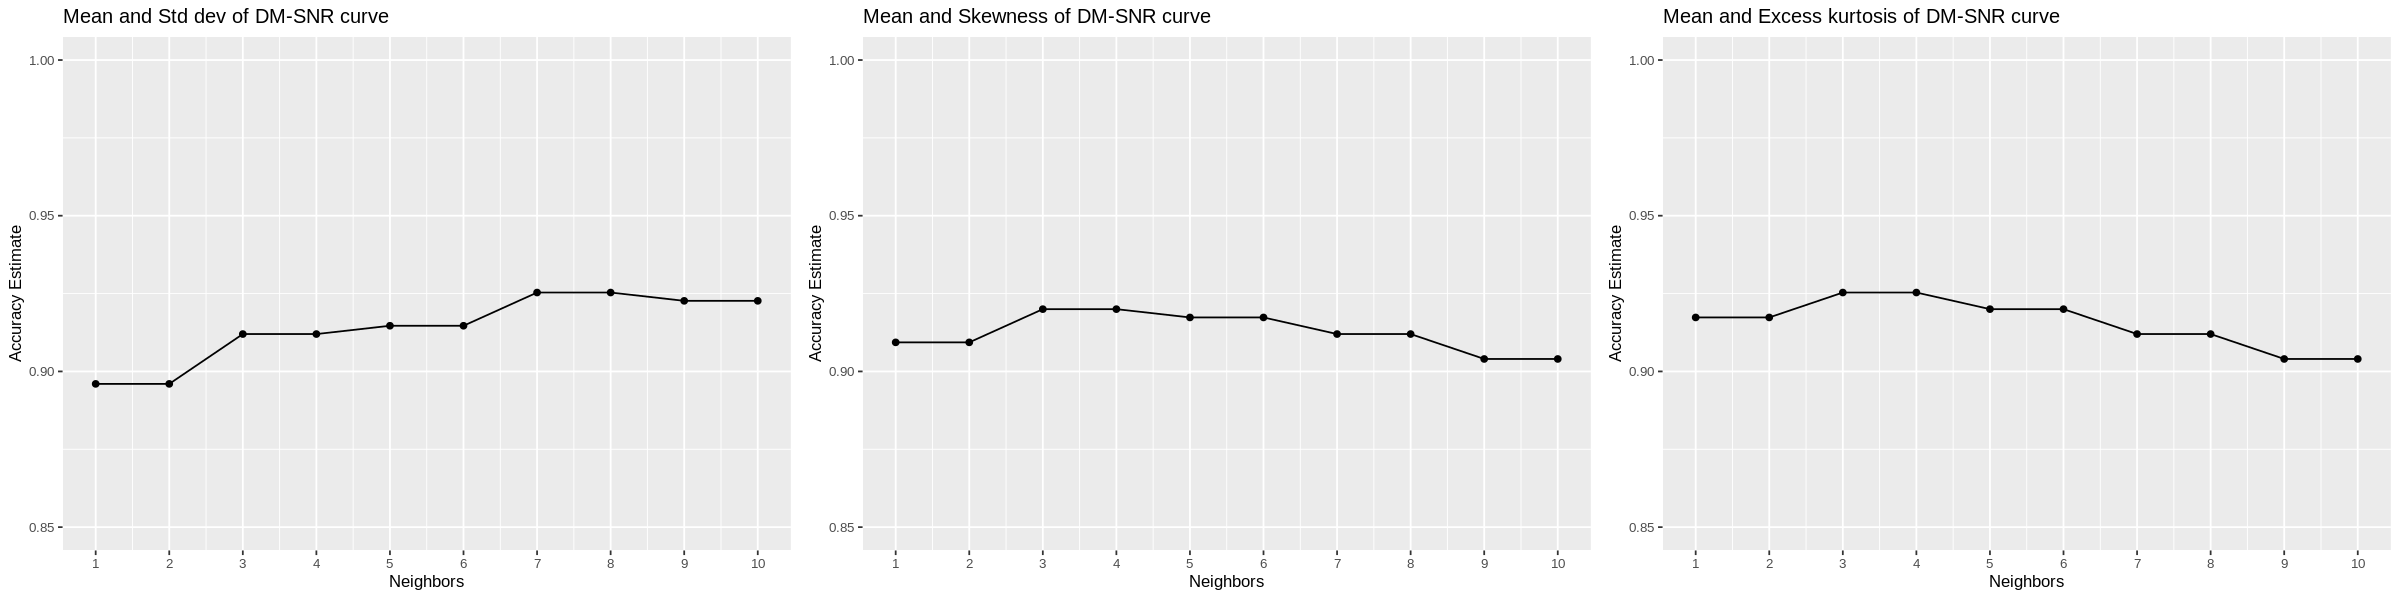

In [19]:
# Creating side-by-side plots of each variable pair

options(repr.plot.width = 20, repr.plot.height = 5)

plot_grid(ip_plot_1, ip_plot_2, ip_plot_3, ncol = 3)
plot_grid(dm_plot_1, dm_plot_2, dm_plot_3, ncol = 3)

14. To choose the set with the highest accuracy, create a data frame containing the highest accuracy with the corresponding k value for each plot as shown below.
Eg. Mean vs Standard deviation of the Integrated Profile
    - Arrange the mean in knn_ip_results_1 in descending order using the arrange() function.
    - Use the slice() and select() functions to select the highest mean and its corresponding k value for the Mean vs Standard deviation of the Integrated Profile.
    - Add a new column called “variables” and the label "Mean IP & Std dev" to this dataframe using the mutate() function.
    - Name the output as max_ip_dev.
15. Repeat Step 14 for each variable pair. Name the outputs accordingly.
16. Combine the objects max_ip_dev, max_ip_skewness, max_ip_kurtosis, max_dm_dev, max_dm_skewness, and  max_dm_kurtosis in a single data frame using the bind_rows() function.
17. Arrange the data in this new data frame by descending order of mean using the arrange() function. Name the output as max_accuracies.
18. Choosing the first row in max_accuracies shows the best variable pair and its corresponding best k value, which is  the Mean and Excess kurtosis of the Integrated Profile with k = 3.


In [20]:
# Choosing the best variable pair

set.seed(19)

max_ip_dev <- knn_ip_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Std dev")

max_ip_skewness <- knn_ip_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Skewness")

max_ip_kurtosis <- knn_ip_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Excess kurtosis")

max_dm_dev <- knn_dm_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Std dev")

max_dm_skewness <- knn_dm_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Skewness")

max_dm_kurtosis <- knn_dm_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables =  "Mean DM-SNR & excess kurtosis")

max_accuracies <- bind_rows(max_ip_dev,max_ip_skewness, max_ip_kurtosis, max_dm_dev, max_dm_skewness, max_dm_kurtosis) %>%
                  arrange(desc(mean))
max_accuracies

neighbors,mean,variables
<int>,<dbl>,<chr>
3,0.9760000,Mean IP & Skewness
3,0.9760000,Mean IP & Excess kurtosis
3,0.9680000,Mean IP & Std dev
7,0.9253333,Mean DM-SNR & Std dev
3,0.9253333,Mean DM-SNR & excess kurtosis
3,0.9200000,Mean DM-SNR & Skewness


***Planned data analysis***

We will build our model using Mean IP and Excess kurtosis as predictors, as we determined above

19. Create a specification for our final knn classification model with a straight line as weight function and using the k = 3 in the neighbor argument. Name the output as pulsar_model_spec. 
20. Create a workflow analysis using the model specification pulsar_model_spec  and recipe pulsar_ip_recipe_3 and pass the training data set to the fit() function. Assign the answer to an object called pulsar_model_fit.
21. Use pulsar_model_fitl to predict on the test dataset and assign this to an object called pulsar_predictions.
22. Report the accuracy of this prediction using the metrics() function, and store this in an object named pulsar_metrics.
23. Create a confusion matrix using the conf_mat() function and store this in an object named pulsar_conf_mat.



In [21]:
# Building our model using Mean IP and Excess kurtosis predictors

set.seed(19)

pulsar_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 3) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_model_fit <- workflow() %>%
            add_recipe(pulsar_ip_recipe_3) %>%
            add_model(pulsar_model_spec) %>%
            fit(data = pulsar_training_data)

pulsar_predictions <- predict(pulsar_model_fit, pulsar_testing_data) %>%
                        bind_cols(pulsar_testing_data)

pulsar_metrics <- pulsar_predictions %>%
                    metrics(truth = class, estimate = .pred_class)
pulsar_metrics

pulsar_conf_mat <- pulsar_predictions %>%
                    conf_mat(truth = class, estimate = .pred_class)
pulsar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9920000
kap,binary,0.9584856


          Truth
Prediction   0   1
         0 111   1
         1   0  13

***Predicting the class of a new observation using our model***

24. Generate random values for the mean and excess kurtosis of an integrated profile using the run_if() function and the minimum and maximum values from the min_max_mean_data.
25. Create a dataframe named random_point using the tibble() function.
26. Predict the class of random_point from the prediction model pulsar_model_fit using the predict() function. Name the output class_prediction.

The class of the random point we created was a pulsar star. All three of its nearest neighbors were classed as pulsars. 


In [22]:
# Generating a new observation and predicting its class using our model

set.seed(19)

random_mean_ip = runif(1, min = 6.5000000, max = 177.828125)
random_excess_kurtosis_ip = runif(1, min = -1.4398314, max = 7.218631)
random_point = tibble(mean_ip = random_mean_ip, excess_kurtosis_ip = random_excess_kurtosis_ip)
random_point

class_prediction <- predict(pulsar_model_fit, random_point)
class_prediction

mean_ip,excess_kurtosis_ip
<dbl>,<dbl>
26.56776,2.751122


.pred_class
<fct>
1


***Visualizing our prediction***

In [23]:
# Scaling our data

set.seed(19)

predicted_new_observation <- tibble(mean_ip = 26.56776,
                         excess_kurtosis_ip = 2.751122,
                         class = "1")

scaled_pulsar_data_with_new_obs <- pulsar_data %>%
                        select(mean_ip, excess_kurtosis_ip, class) %>%
                        bind_rows(predicted_new_observation) %>%
                        mutate(scaled_mean_ip = scale(mean_ip, center = TRUE),
                               scaled_excess_kurtosis_ip = scale(excess_kurtosis_ip, center = TRUE))

scaled_pulsar_only_data <- scaled_pulsar_data_with_new_obs %>%
                            filter(class == "1") %>%
                            select(class, scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
                            filter(scaled_mean_ip > -3.5, 
                                   scaled_mean_ip < -2, 
                                   scaled_excess_kurtosis_ip > 1, 
                                   scaled_excess_kurtosis_ip < 3) %>%
                            arrange(scaled_excess_kurtosis_ip)
scaled_pulsar_only_data

class,scaled_mean_ip,scaled_excess_kurtosis_ip
<chr>,"<dbl[,1]>","<dbl[,1]>"
1,-2.581993,1.312206
1,-2.870874,1.464143
1,-3.075832,1.953841
1,-2.071848,2.175395
1,-2.274698,2.443051
1,-2.038184,2.473219
1,-2.415973,2.645517
1,-2.365908,2.753304
1,-2.530490,2.872846


In [24]:
# Finding the nearest neighbors by calculating the distance from the scaled random_point

set.seed(19)

distance_1 <- scaled_pulsar_only_data %>%
    slice(1, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_1

distance_2 <- scaled_pulsar_only_data %>%
    slice(2, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_2

distance_4 <- scaled_pulsar_only_data %>%
    slice(4, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_4

distance_5 <- scaled_pulsar_only_data %>%
    slice(5, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_5

distance_6 <- scaled_pulsar_only_data %>%
    slice(6, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_6

distance_7 <- scaled_pulsar_only_data %>%
    slice(7, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_7

distance_8 <- scaled_pulsar_only_data %>%
    slice(8, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_8

distance_9 <- scaled_pulsar_only_data %>%
    slice(9, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_9

distance_10 <- scaled_pulsar_only_data %>%
    slice(10, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_10

          1
2 0.8096738

         1
2 0.530859

         1
2 1.028139

         1
2 0.938692

         1
2 1.160374

          1
2 0.9559444

         1
2 1.069174

        1
2 1.06863

         1
2 1.106822

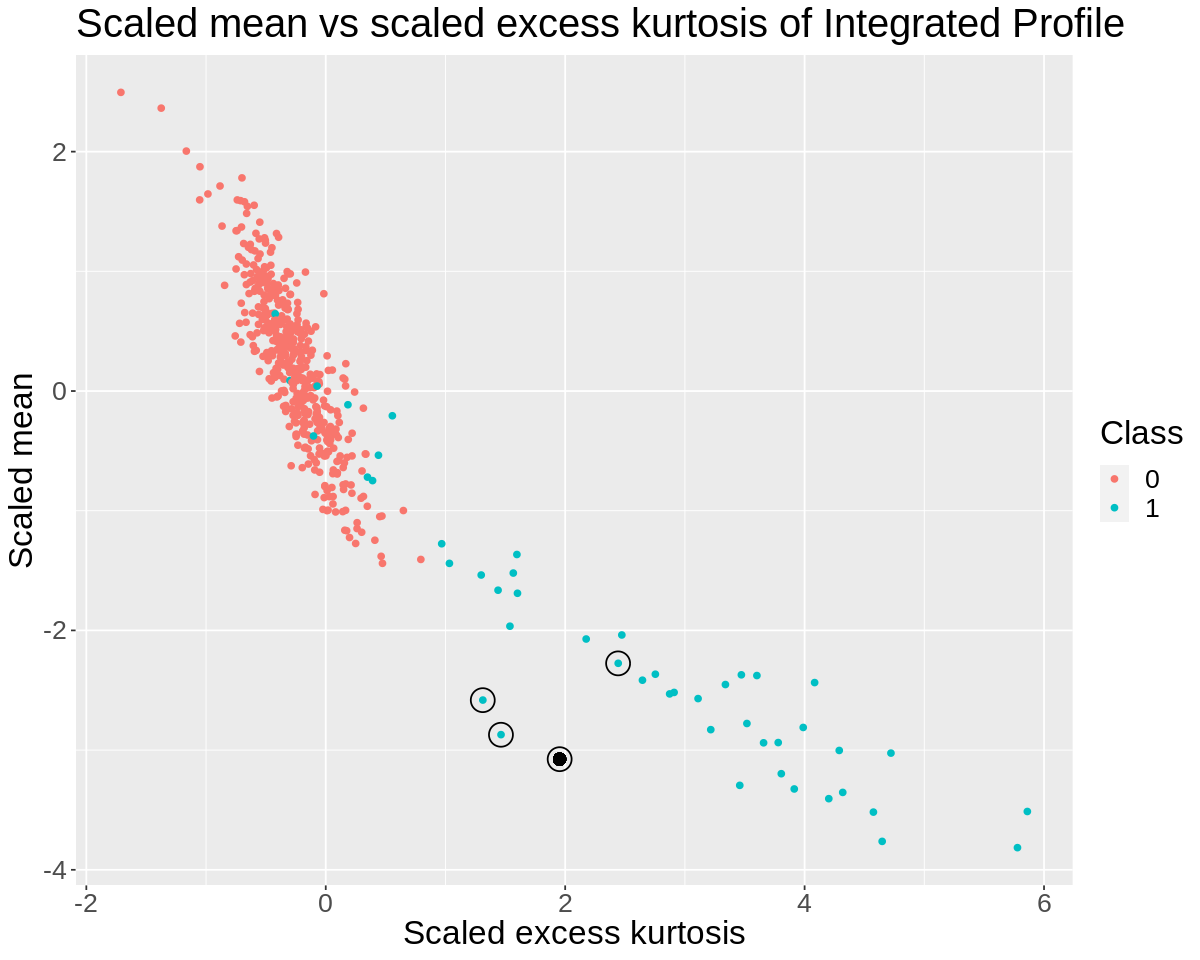

In [25]:
# Visualization of classification with scaled data

set.seed(19)

options(repr.plot.width = 10, repr.plot.height = 8)

point1 <- c(1.953841, -3.075832)
point2 <- c(1.46349305, -2.87168441)
point3 <- c(1.31160611, -2.58273031)
point4 <- c(2.442077, -2.275357)

scaled_mean_vs_kurtosis_plot <- scaled_pulsar_data_with_new_obs %>%
                            ggplot(aes(x = scaled_excess_kurtosis_ip, y = scaled_mean_ip, color = class)) +
                            geom_point() +
                            geom_point(aes(x = 1.953841, y = -3.075832), color = "black", size = 3) +
                            labs(x = "Scaled excess kurtosis", y = "Scaled mean", color = "Class") +
                            ggtitle("Scaled mean vs scaled excess kurtosis of Integrated Profile") +
                            theme(text = element_text(size = 20)) +

                            annotate("path", 
                             x=point1[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                    
                            annotate("path", 
                             x=point2[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                            
                            annotate("path", 
                             x=point3[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point3[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                             
                            annotate("path", 
                             x=point4[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point4[2] + 0.1*sin(seq(0,2*pi,length.out=100)))
                            
scaled_mean_vs_kurtosis_plot

**Discussions**

In the exploratory data analysis, it was determined that mean and excess kurtosis of integrated profile has the highest average, with a k-value of 3. Since these parameters gave the highest accuracy, they were used in our final model.

 It is important to note that the accuracy values are higher than what is typically expected from such an analysis. We believe this is the case as we made the conscious choice to leave our data unbalanced in terms of class. We were encountering k vs accuracy plots when we were balancing our data with various methods, and this problem was resolved when left the data unbalanced. When we observed the confusion matrix of the model that used the unbalanced data, we found that while the accuracy is still very high, the accuracy was consistent between the two classes. Because of this observation, we decided it was ok to use the unbalanced data.

Integrated profile was an overall more accurate predictor of class than DM-SNR curve, which was expected as, during our preliminary data analysis, class appeared to vary more strongly in the case of the integrated profile.

It is visually clear that our random point would be assigned as a pulsar star, due to its location on the graph, and the neighboring points around it.

These findings regarding the most reliable predictors, as well as our prediction of a random set of values can be used to make quick and simple predictions regarding data points that fall clearly within the pulsar or non-pulsar areas of the graph. By only using two variables to predict, predictions can be made very quickly.

This finding can also be further expanded on by exploring if including a third predictor would produce more accurate results, especially in the range of our data where both pulsars and non-pulsars currently fall, which may currently be inaccurately predicted.



**References**

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656	
https://archive.ics.uci.edu/ml/datasets/HTRU2 

M. J. Keith et al., 'The High Time Resolution Universe Pulsar Survey - I. System Configuration and Initial Discoveries',2010, Monthly Notices of the Royal Astronomical Society, vol. 409, pp. 619-627. DOI: 10.1111/j.1365-2966.2010.17325.x

D. R. Lorimer and M. Kramer, 'Handbook of Pulsar Astronomy', Cambridge University Press, 2005.

